In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
import scipy.io
import os

from functions import *

## Import data

In [6]:
#Fake data
df = pd.DataFrame({})
regions = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "L"]

for i in range(len(regions)):
  df.insert(i, column=regions[i], value=np.random.laplace(size=int(1e6)))

In [4]:
#Open multiple dataset from "./data/" folder
datasets = []
for file in os.listdir("data"):
    try:
        data = scipy.io.loadmat("./data/" + file)
        data = pd.DataFrame(data["tseries"].T)
        datasets.append(data)
    except:
        print("Problem with \"" + str(file) + "\" file")

print("Uploaded " + str(len(datasets)) + " file")

Uploaded 96 file


## Single-dataset analysis

In [5]:
#First dataset as example
df = datasets[42]
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
1195,13581.449219,11393.600586,12211.963867,11104.995117,11732.625977,12448.721680,10804.381836,11568.866211,11659.625000,10458.022461,...,11978.264906,11654.908875,13098.418111,12510.470731,8976.746663,8109.716675,11498.583362,11164.004176,12908.126259,11677.407860
1196,13574.262695,11435.392578,12165.772461,11158.489258,11813.128906,12418.145508,10838.346680,11601.511719,11732.769531,10483.890625,...,12061.317789,11600.694963,13106.353729,12482.793708,9104.512006,8085.951311,11508.794683,11208.764984,12956.827597,11650.048106
1197,13564.376953,11419.376953,12171.232422,11147.748047,11798.538086,12420.848633,10824.766602,11565.976562,11705.176758,10494.071289,...,12124.084879,11657.540372,13058.476941,12461.930904,9003.510995,8188.947632,11553.680193,11151.371386,12970.774047,11739.714835
1198,13529.868164,11417.537109,12137.254883,11099.166016,11798.520508,12374.954102,10770.069336,11553.614258,11637.694336,10484.833984,...,12029.151607,11597.863262,13097.834510,12461.207594,8989.561466,8119.863610,11538.659258,11175.744686,12969.613818,11709.406568
1199,13614.111328,11439.223633,12130.485352,11139.552734,11818.432617,12407.934570,10810.071289,11600.670898,11643.098633,10487.114258,...,12068.864957,11647.194177,13100.984094,12449.265147,8968.554464,8045.656395,11555.169042,11140.762521,12951.371351,11685.898868


<Axes: >

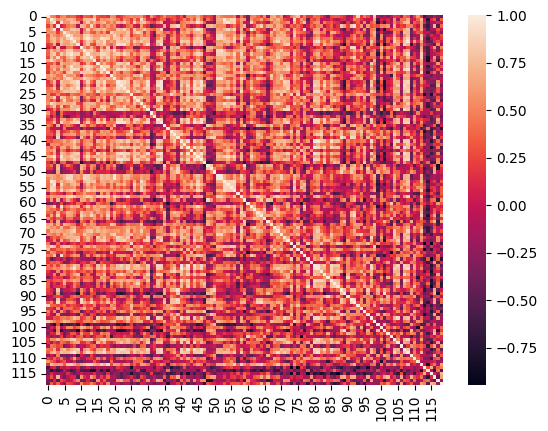

In [6]:
stream = dFC_stream(df, 8)

FC_0 = stream[0]
sn.heatmap(FC_0)

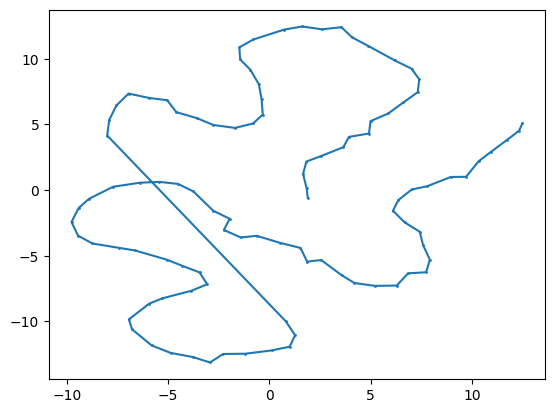

In [7]:
random_walk = tSNE_evolution(stream, TSNE, 2)

plt.scatter(random_walk[0], random_walk[1], s=1)
plt.plot(random_walk[0], random_walk[1])

<Axes: >

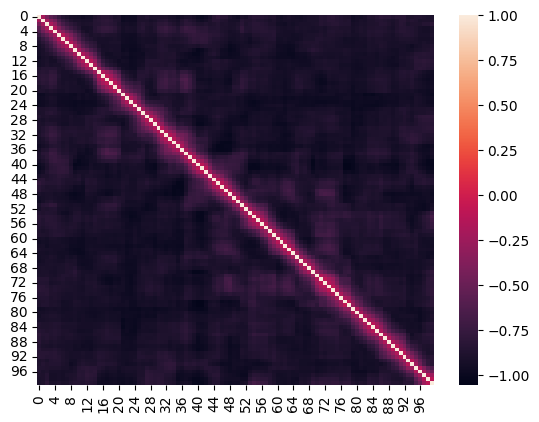

In [8]:
autocorrelation = dFC_matrix(stream)

sn.heatmap(autocorrelation)

(array([ 720., 2903.,  772.,  179.,   85.,   56.,   67.,   53.,   47.,
          68.]),
 array([-1.05524383, -0.95836154, -0.86147926, -0.76459697, -0.66771468,
        -0.5708324 , -0.47395011, -0.37706782, -0.28018554, -0.18330325,
        -0.08642096]),
 <BarContainer object of 10 artists>)

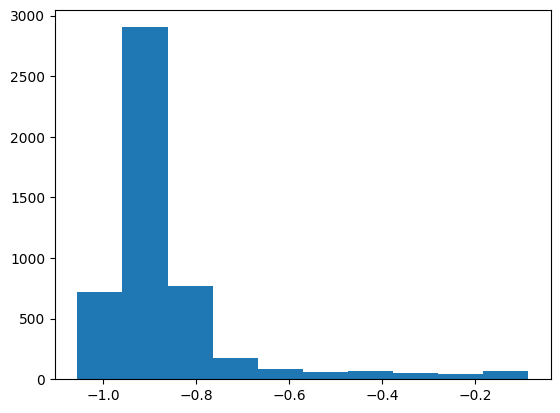

In [9]:
dFC_distribution = autocorrelation[np.triu_indices(autocorrelation.shape[1], k=1)]

plt.hist(dFC_distribution)

99


(array([12., 23., 21., 15.,  8.,  7.,  6.,  4.,  1.,  2.]),
 array([0.00971729, 0.01630506, 0.02289282, 0.02948059, 0.03606835,
        0.04265611, 0.04924388, 0.05583164, 0.06241941, 0.06900717,
        0.07559494]),
 <BarContainer object of 10 artists>)

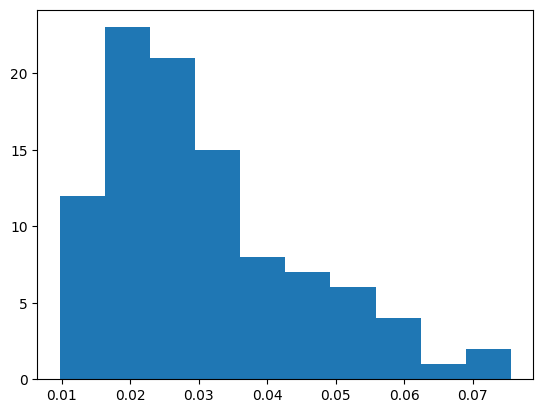

In [53]:
v_dist = pooled_v_stream(df, 21, 21)
print(len(v_dist))

plt.hist(v_dist)

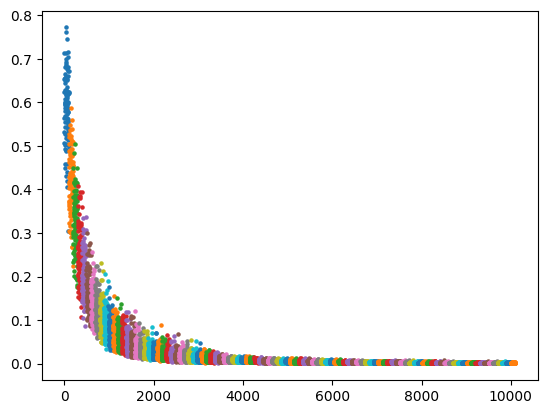

In [11]:
v = np.array([])
for i in np.arange(3, 105):
    v_i = pooled_v_stream(df, i, i)
    plt.scatter(np.arange(start=len(v), stop=(len(v)+len(v_i))), v_i, s=5)

    v = np.concatenate((v, v_i)) 

## More analysis

**ranges**:  *short* (3-8 TRs), *mid* (9-32 TRs), *long* (33-105 TRs) 

In [51]:
v_dist_global = np.array([])

for data in datasets[70:80]:
    v_dist_single = pooled_v_stream(df, 100, 100)
    v_dist_global = np.concatenate((v_dist_global, v_dist_single))

(array([160., 210., 240., 190., 100.,  50.,  10.,  10.,  10.,  10.]),
 array([0.00057274, 0.0010051 , 0.00143746, 0.00186982, 0.00230218,
        0.00273454, 0.00316689, 0.00359925, 0.00403161, 0.00446397,
        0.00489633]),
 <BarContainer object of 10 artists>)

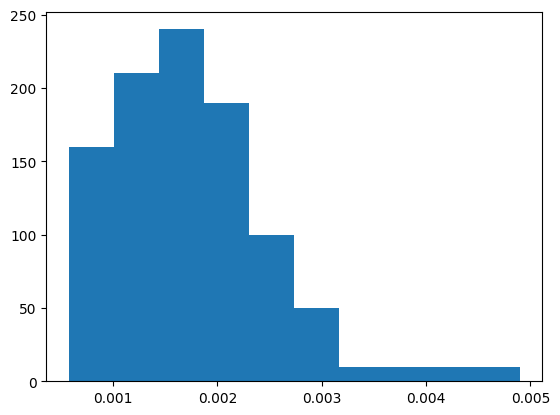

In [52]:
plt.hist(v_dist_global)

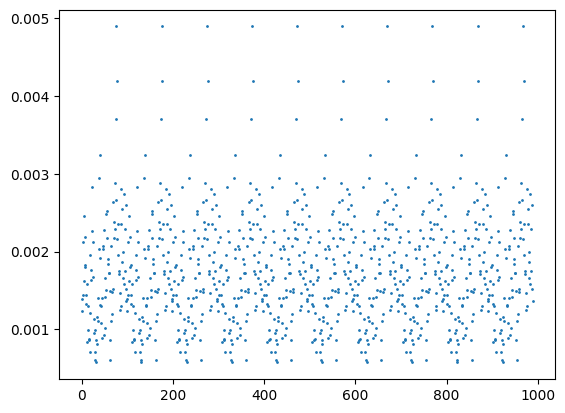

In [50]:
plt.scatter(np.arange(len(v_dist_global)), v_dist_global, s=1)